<h1>Biodiversity</h1>

In [869]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


observed = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
'''

'''
# Merging, Scoping, and Standard EDA
biodiversity = pd.merge(observed, species, how='left')
print(biodiversity.info())
print(biodiversity.head(20))
print(biodiversity.columns)
print()
print(biodiversity['category'].unique())
print(biodiversity['category'].value_counts())
print(biodiversity['park_name'].unique())
print(biodiversity['park_name'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None
                        scientific_name                            park_name  \
0                    Vicia benghalensis  Great Smoky Mountains National Park   
1                        Neovison vison  Great Smoky Mountains National Park   
2                     Prunus subcordata               Yosemite National Park   
3                  Abutilon theophrasti                  Bryce National Park   
4              Githopsis specularioides  Grea

In [870]:
print(f"Species shape: {species.shape}")
print(f"Observations shape: {observed.shape}")
print(f"Biodiverity merged shape: {biodiversity.shape}")

Species shape: (5824, 4)
Observations shape: (23296, 3)
Biodiverity merged shape: (25632, 6)


In [871]:
print(f"number of species:{biodiversity['scientific_name'].nunique()}")
print(f"species:{biodiversity['scientific_name'].unique()}")

number of species:5541
species:['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']


Before clean up

In [872]:
print(f"number of categories:{biodiversity.category.nunique()}")
print(f"categories type:{biodiversity.category.unique()}")
print(f'Value counts of category:{biodiversity.category.value_counts()}')

print()
print(f"number of parks:{biodiversity.category.nunique()}")
print(f"parks type:{biodiversity.category.unique()}")
print(f'Value counts of category:{biodiversity.park_name.value_counts()}')

print()
print(f"Total size of each category:{biodiversity.groupby('category').size()}")

print()
print(f"number of conservation statuses:{biodiversity.conservation_status.nunique()}")
print(f"Conservation statuses types:{biodiversity.conservation_status.unique()}")

print()
print(f"Absence of Conservation Status:{biodiversity.conservation_status.isna().sum()}")
print(f"Total size of Conservations Status:{biodiversity.groupby('conservation_status').size()}")

number of categories:7
categories type:['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
Value counts of category:category
Vascular Plant       19560
Bird                  2364
Nonvascular Plant     1332
Mammal                1200
Fish                   524
Amphibian              328
Reptile                324
Name: count, dtype: int64

number of parks:7
parks type:['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
Value counts of category:park_name
Great Smoky Mountains National Park    6408
Yosemite National Park                 6408
Bryce National Park                    6408
Yellowstone National Park              6408
Name: count, dtype: int64

Total size of each category:category
Amphibian              328
Bird                  2364
Fish                   524
Mammal                1200
Nonvascular Plant     1332
Reptile                324
Vascular Plant       19560
dtype: int64

number of conservation statuses:4


In [873]:
#Cleanup
#
duplicated = biodiversity.duplicated().value_counts()
duplicated_subset = biodiversity[biodiversity.duplicated()].reset_index()
print(duplicated)
print(duplicated_subset)

print()
Conservation_nonull = biodiversity[biodiversity['conservation_status'].notnull()]
print(Conservation_nonull.conservation_status)

print()
biodiversity = biodiversity.drop_duplicates().sort_values(by=['category']).fillna('No Intervention').reset_index(drop=True)
#biodiversity = biodiversity.fillna('No Intervention')
print(biodiversity.head(20))
print(biodiversity.info())

False    25601
True        31
Name: count, dtype: int64
    index         scientific_name                            park_name  \
0    7999  Echinochloa crus-galli  Great Smoky Mountains National Park   
1    8000  Echinochloa crus-galli  Great Smoky Mountains National Park   
2    9590   Streptopelia decaocto            Yellowstone National Park   
3    9591   Streptopelia decaocto            Yellowstone National Park   
4    9592   Streptopelia decaocto            Yellowstone National Park   
5   11056          Plantago major  Great Smoky Mountains National Park   
6   11057          Plantago major  Great Smoky Mountains National Park   
7   11768           Arctium minus               Yosemite National Park   
8   11769           Arctium minus               Yosemite National Park   
9   13676    Eleocharis palustris  Great Smoky Mountains National Park   
10  13677    Eleocharis palustris  Great Smoky Mountains National Park   
11  14752     Hesperis matronalis                  Bryce

After clean up

In [874]:
print(f"number of categories:{biodiversity.category.nunique()}")
print(f"categories type:{biodiversity.category.unique()}")
print(f'Value counts of Categories:\n{biodiversity.category.value_counts()}')

print()
print(f"number of parks:{biodiversity.category.nunique()}")
print(f"parks type:{biodiversity.category.unique()}")
print(f'Value counts of Park Names:\n{biodiversity.park_name.value_counts()}')

print()
print(f"Total size of each Category:\n{biodiversity.groupby('category').size()}")

print()
print(f"number of conservation status:{biodiversity.conservation_status.nunique()}")
print(f"Conservation status types:\n{biodiversity.conservation_status.unique()}")

print()
filtered_value = biodiversity[biodiversity['conservation_status'] == 'No Intervention']
#print(filtered_value)
print(f"Absence of Conservation Status:{filtered_value['conservation_status'].count()}")
print(f"Total size of Conservations Status:\n{biodiversity.groupby('conservation_status').size()}")
print(f"Conservations Status within categories:\n{biodiversity.groupby(['conservation_status','category']).size()}")
print()
print(f"Total num of Observations {biodiversity.observations.sum()}")

number of categories:7
categories type:['Amphibian' 'Bird' 'Fish' 'Mammal' 'Nonvascular Plant' 'Reptile'
 'Vascular Plant']
Value counts of Categories:
category
Vascular Plant       19534
Bird                  2361
Nonvascular Plant     1332
Mammal                1198
Fish                   524
Amphibian              328
Reptile                324
Name: count, dtype: int64

number of parks:7
parks type:['Amphibian' 'Bird' 'Fish' 'Mammal' 'Nonvascular Plant' 'Reptile'
 'Vascular Plant']
Value counts of Park Names:
park_name
Bryce National Park                    6406
Yosemite National Park                 6402
Yellowstone National Park              6397
Great Smoky Mountains National Park    6396
Name: count, dtype: int64

Total size of each Category:
category
Amphibian              328
Bird                  2361
Fish                   524
Mammal                1198
Nonvascular Plant     1332
Reptile                324
Vascular Plant       19534
dtype: int64

number of conservation stat

<h3>Analysis And Graphing</h3>
The different categories that are nested in the `conservation_status` column are a total of 4, excluding 'no intervention' which isn't required. There is both the table and chart to explore below.
<ol>
<li>In the `Endangered` status, Amphibians and vascular plants are less at risk yet mammals are more at risk.</li>
<li>In `In Recovery` status,  birds and mammal are of equal standing and the only categories in recovery.</li>
<li>In the 'Species of concern' Birds, Mammals, and Vascular Plant have the highest percentage among all 7 categories, birds especially.</li>
<li>In 'Threatened', Fish are the most at risk.</li>
</0l>
<p>Amphibians seem to be the less likely at risk in all Conservation status.</p>

category             Amphibian   Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                      
Endangered                 4.0   16.0  12.0    44.0                NaN   
In Recovery                NaN   12.0   NaN    12.0                NaN   
Species of Concern        16.0  320.0  16.0   168.0               20.0   
Threatened                 8.0    NaN  20.0     8.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             4.0  
In Recovery              NaN             NaN  
Species of Concern      20.0           172.0  
Threatened               NaN             8.0  


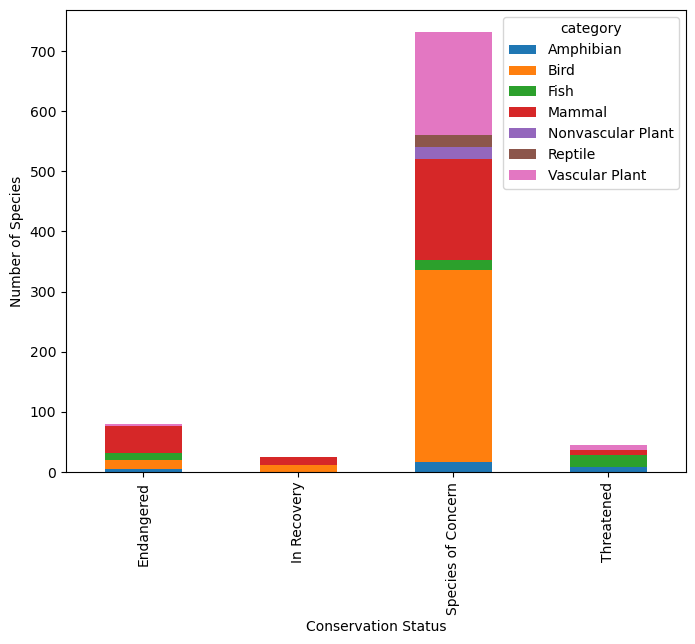

<Figure size 640x480 with 0 Axes>

In [875]:
conservationCategotry = biodiversity[biodiversity.conservation_status != "No Intervention"].groupby(['conservation_status','category'])['scientific_name']\
    .count().unstack()
print(conservationCategotry)


ax = conservationCategotry.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()
plt.clf()


<h3>In conservation</h3>

<p>Now which certain types of species are more likely to be endangered? Using a new column called `is_protected`, demostrates this while excluding any species that had a value with `No Intervention`. Then group by `category` and `is_protected` shows the break down of each species type and protection status while the aggregate function takes the unique num count from each scientific name column that is protected based on groupby. 
</p>
<p>As seen, majority of protection fall to Birds, Vascular Plants, and Mammals. However, as a percentage, Mammal have the highest rate of protection. </p>

In [876]:
biodiversity['is_protected'] = biodiversity.conservation_status != 'No Intervention'

protected_subset = biodiversity.groupby(['category', 'is_protected']).scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                            index='category',
                            values='scientific_name')\
                        .reset_index()
protected_subset.columns = ['category', 'not_protected', 'protected']
print(protected_subset)

protected_subset['percentage_protected'] = round(protected_subset.protected / (protected_subset.protected + protected_subset.not_protected) * 100, 2)
#protected_subset['percentage_nonprotected'] = protected_subset.not_protected / (protected_subset.protected + protected_subset.not_protected) * 100
print(protected_subset)

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46
            category  not_protected  protected  percentage_protected
0          Amphibian             72          7                  8.86
1               Bird            413         75                 15.37
2               Fish            115         11                  8.73
3             Mammal            146         30                 17.05
4  Nonvascular Plant            328          5                  1.50
5            Reptile             73          5                  6.41
6     Vascular Plant           4216         46                  1.08


#### Statistical Significance
Using chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:
||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

and so on...

In [880]:
from scipy.stats import chi2_contingency

# From Mammals to birds
contingency1 = [[30, 146],
                [75, 413]]
print(chi2_contingency(contingency1))

#From Mammals to reptiles
contingency2 = [[30, 146],
                [5, 73]]
print(chi2_contingency(contingency2))

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))
Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))


<h3>Searching Specific Species Using Regex</h3>
<p>In the data, there are several different scientific names for different types of species.  Well use regular expressions to located which rows of records contains the desired 'Species' were referring too. A new column made up of boolean values will be created to check if `is_(species)` is `True`.</p>

In [878]:
desired ='Frog'
search_subset = biodiversity[100:2000] # subset dataframe of indexed biodiversity
search_subset[f'is_{desired}'] = biodiversity['common_names'].str.contains("F?rog", regex = True)

print(search_subset.head())
print(search_subset[[f'is_{desired}']].head())
print()

# Finding Sum of Observation w/ desired Species
frog_observations = biodiversity.merge(search_subset, how='right')
#print(frog_observations.info())
sum_obs_by_park = frog_observations.groupby('park_name').observations.sum().reset_index()
print(sum_obs_by_park)
protected_by_park = frog_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
print(protected_by_park )

                      scientific_name                            park_name  \
100             Pseudacris triseriata               Yosemite National Park   
101  Ensatina eschscholtzii platensis            Yellowstone National Park   
102                    Rana palustris                  Bryce National Park   
103                   Hyla versicolor               Yosemite National Park   
104                  Anaxyrus canorus  Great Smoky Mountains National Park   

     observations   category                              common_names  \
100           103  Amphibian  Striped Chorus Frog, Western Chorus Frog   
101           270  Amphibian                    Sierra Nevada Ensatina   
102           116  Amphibian                             Pickerel Frog   
103           156  Amphibian                             Gray Treefrog   
104            30  Amphibian                             Yosemite Toad   

    conservation_status  is_protected  is_Frog  
100     No Intervention         False

C:\Users\TyQueece\AppData\Local\Temp\ipykernel_17436\826521536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_subset[f'is_{desired}'] = biodiversity['common_names'].str.contains("F?rog", regex = True)


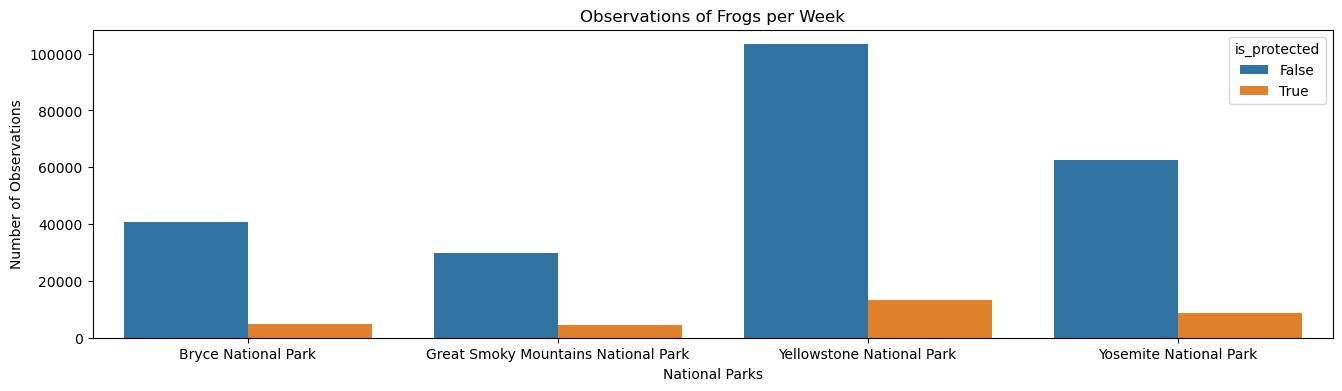

<Figure size 640x480 with 0 Axes>

In [879]:
# Side by Side Bar Plot of above code
plt.figure(figsize=(16, 4))
sns.barplot(x = protected_by_park.park_name, y = protected_by_park.observations, hue = protected_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Frogs per Week')
plt.show()
plt.clf()

<h2>Conclusions</h2>
<p>This project was also able to answer some of the questions:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation, to be exact 880 vs 25632.
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
</p>